In [12]:
# Importing Libraries
import tensorflow as tf
import os
import numpy as np
import sys
import random
import cv2
import glob
import matplotlib.pyplot as plt
import xlrd
import tensorflow.keras.backend as K
import pandas as pd
import requests
# import nvidia_smi

from PIL import Image
from io import BytesIO
from tqdm.notebook import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
from tensorflow.python.client import device_lib


from tensorflow.python.ops import confusion_matrix
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import array_ops

# Changing directories to access the dataset
d = os.getcwd()
if d != '/home/ec2-user/SageMaker/Semantic_Segmentation' :
    os.chdir("..")

(512, 512, 3)


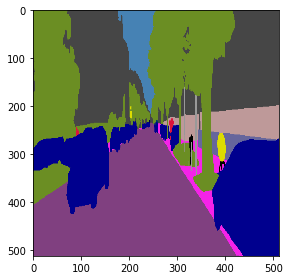

In [48]:
response = requests.get('https://test-seg.s3.amazonaws.com/kitti/training/semantic_rgb/000000_10.png')
train = np.asarray(Image.open(BytesIO(response.content)), dtype='uint8')
train = cv2.resize(train, (512,512), interpolation = cv2.INTER_AREA)
# train = cv2.cvtColor(train, cv2.COLOR_BGR2RGB)
print(train.shape)
imshow(train)
plt.show()

In [50]:
from labels import *

In [52]:
l = np.load('ValImageNames.npy')
l1 = np.load('ValMaskNames.npy')
np.savez_compressed('ValNames', image = l, label = l1)

In [51]:
labelID = {}
rbgColorID = {}

for i,label in enumerate(labels):
    labelID[i] = label.name
    rgbColorID[i] = label.color

print(labelID)
print(rgbColorID)

{0: 'unlabeled', 1: 'dynamic', 2: 'ground', 3: 'road', 4: 'sidewalk', 5: 'parking', 6: 'rail track', 7: 'building', 8: 'wall', 9: 'fence', 10: 'guard rail', 11: 'bridge', 12: 'tunnel', 13: 'pole', 14: 'traffic light', 15: 'traffic sign', 16: 'vegetation', 17: 'terrain', 18: 'sky', 19: 'person', 20: 'rider', 21: 'car', 22: 'truck', 23: 'bus', 24: 'caravan', 25: 'trailer', 26: 'train', 27: 'motorcycle', 28: 'bicycle', 29: 'license plate'}
{0: (0, 0, 0), 1: (111, 74, 0), 2: (81, 0, 81), 3: (128, 64, 128), 4: (244, 35, 232), 5: (250, 170, 160), 6: (230, 150, 140), 7: (70, 70, 70), 8: (102, 102, 156), 9: (190, 153, 153), 10: (180, 165, 180), 11: (150, 100, 100), 12: (150, 120, 90), 13: (153, 153, 153), 14: (250, 170, 30), 15: (220, 220, 0), 16: (107, 142, 35), 17: (152, 251, 152), 18: (70, 130, 180), 19: (220, 20, 60), 20: (255, 0, 0), 21: (0, 0, 142), 22: (0, 0, 70), 23: (0, 60, 100), 24: (0, 0, 90), 25: (0, 0, 110), 26: (0, 80, 100), 27: (0, 0, 230), 28: (119, 11, 32), 29: (0, 0, 142), 30

In [41]:
def rgb_to_onehot(rgb_image, colormap):
    '''Function to one hot encode RGB mask labels
        Inputs: 
            rgb_image - image matrix (eg. 256 x 256 x 3 dimension numpy ndarray)
            colormap - dictionary of color to label id
        Output: One hot encoded image of dimensions (height x width x num_classes) where num_classes = len(colormap)
    '''
    num_classes = len(colormap)
    shape = rgb_image.shape[:2]+(num_classes,)
    encoded_image = np.zeros( shape, dtype=np.int8 )
    index = 0
    for i, cls in enumerate(colormap):
        encoded_image[:,:,index] = np.all(rgb_image.reshape( (-1,3) ) == colormap[i], axis=1).reshape(shape[:2])
        index += 1
        
    return encoded_image

unlabeled


/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


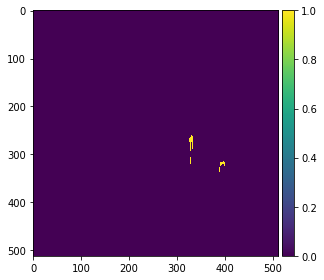

outlier


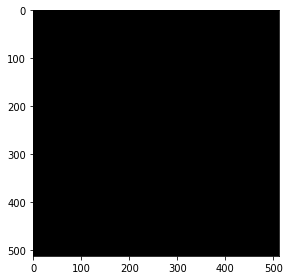

car


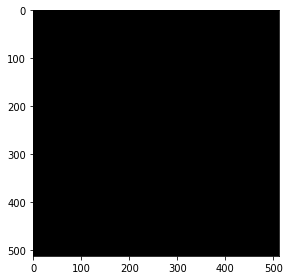

bicycle


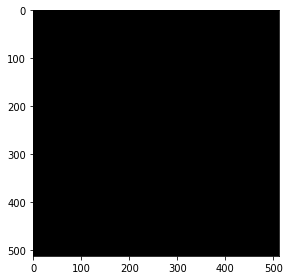

bus


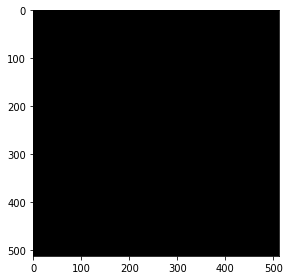

motorcycle


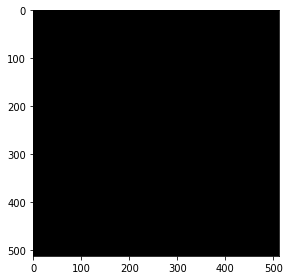

on-rails


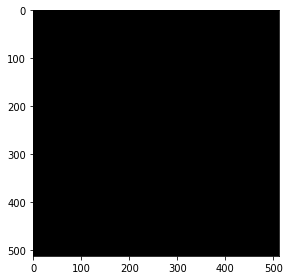

truck


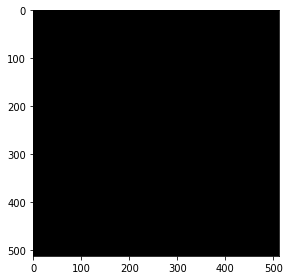

other-vehicle


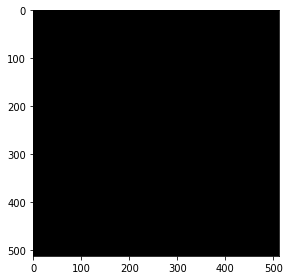

person


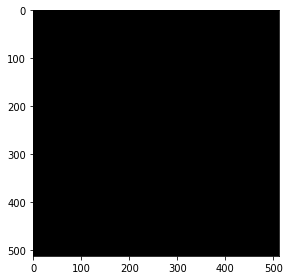

bicyclist


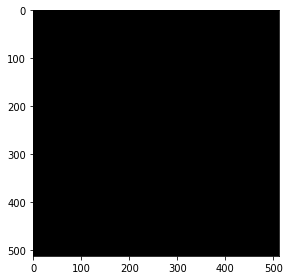

motorcyclist


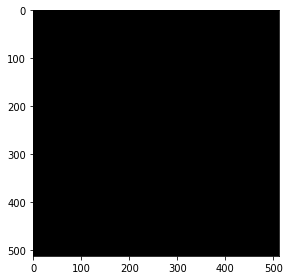

road


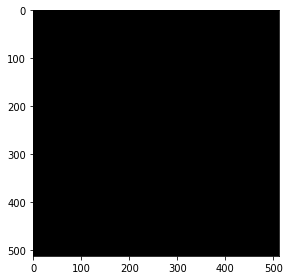

parking


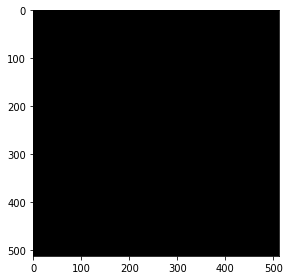

sidewalk


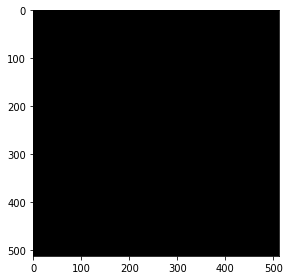

other-ground


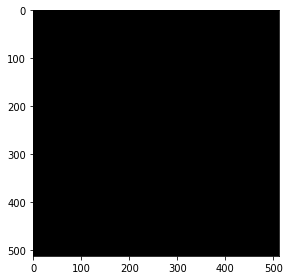

building


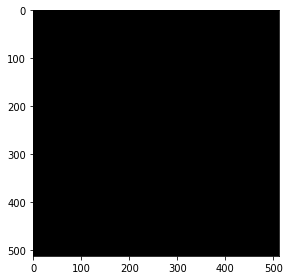

fence


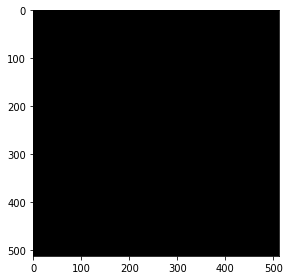

other-structure


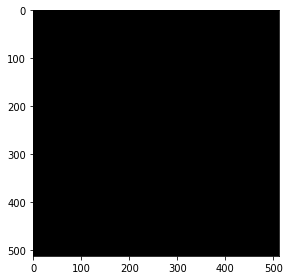

lane-marking


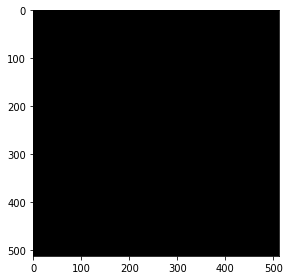

vegetation


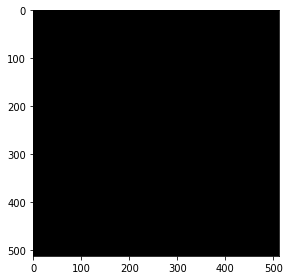

trunk


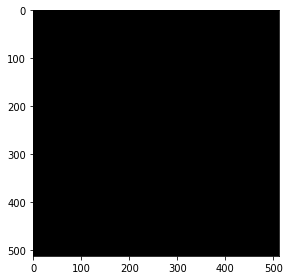

terrain


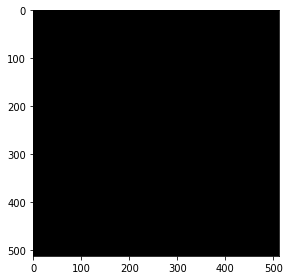

pole


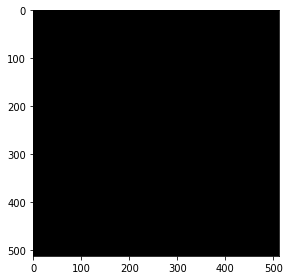

traffic-sign


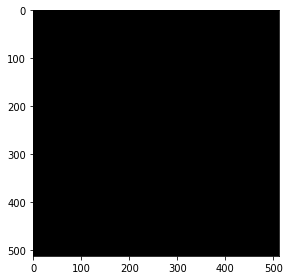

other-object


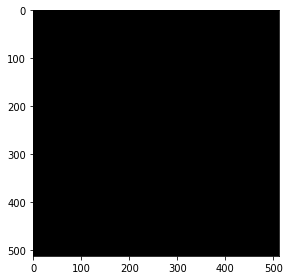

moving-car


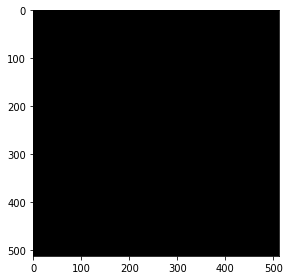

moving-bicyclist


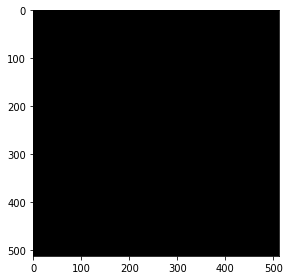

moving-person


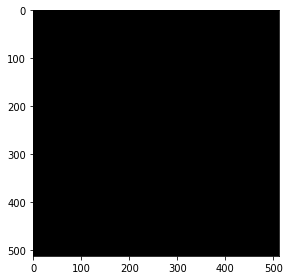

moving-motorcyclist


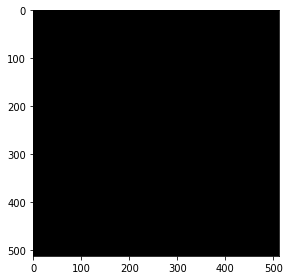

moving-on-rails


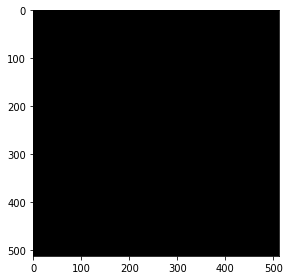

moving-bus


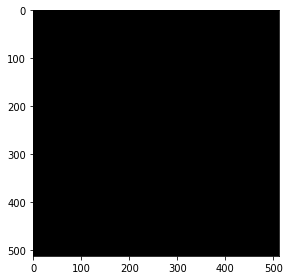

moving-truck


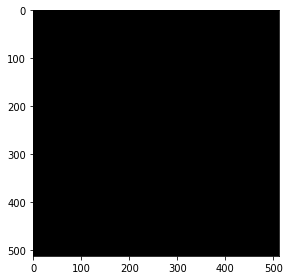

moving-other-vehicle


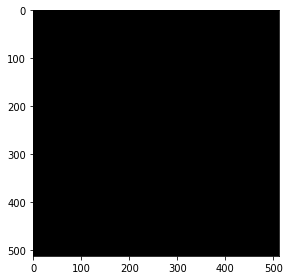

In [42]:
img1 = rgb_to_onehot(train, rgbColorID)

for i in range(len(rgbColorID)):
    print(labelID[i])
    imshow(img1[:,:,i])
    plt.show()